# Titanic dataset
## Task overview
- Understand nature of data
- Visualise
- Fix missing data
- Get the correlation between each metrics
- explore interesting themes like:
- ..... do the wealthy survive?
- ..... by location
- ..... age scatterplot with ticket price
- ..... young and welathy 
- ..... total spent
- Feature Engineering
- Preprocess data together and use a transformer
- Scaling

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background") #dark-mode only user :)

titanic_train = pd.read_csv("/home/alpharaoh/Documents/coding/uni/ai/titanic/train.csv")
titanic_test = pd.read_csv("/home/alpharaoh/Documents/coding/uni/ai/titanic/test.csv")

# quick overview
#titanic_train.describe()
titanic_train.info()
#titanic_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [377]:
titanic_train.hist(bins=50, figsize=(15,10))
plt.show();

In [378]:
# get corrilation of attributes with respect to survived
corr_matrix = titanic_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

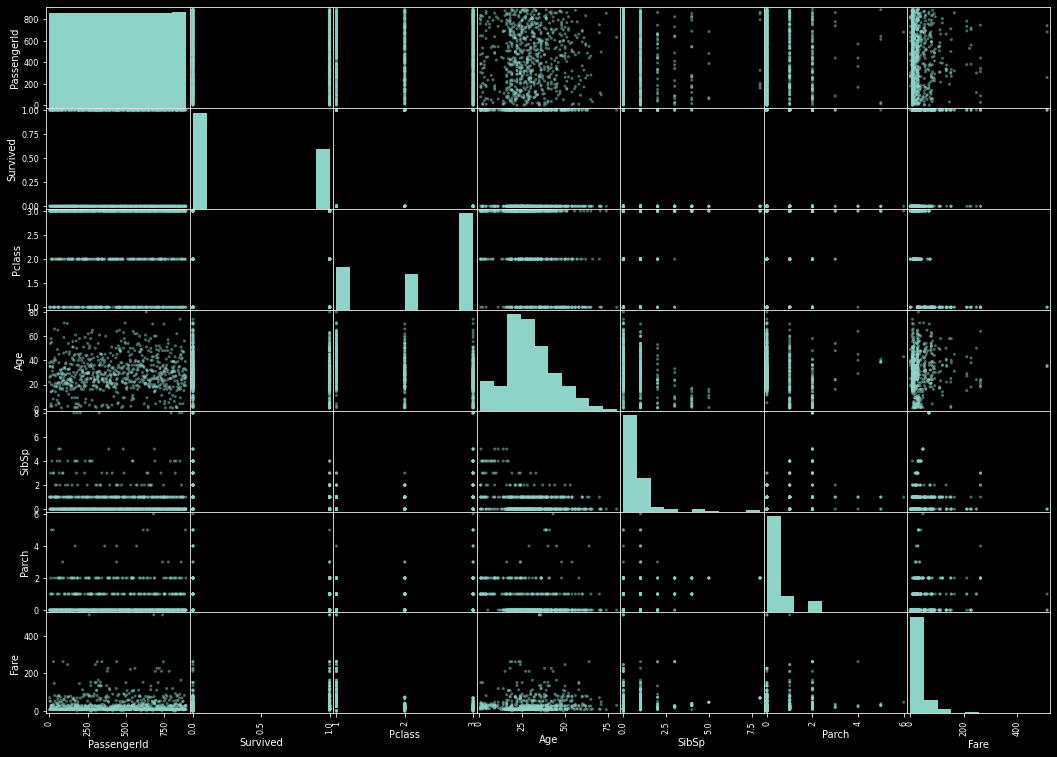

In [379]:
# we can also show correlations with pandas
from pandas.plotting import scatter_matrix
attributes = ["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
scatter_matrix(titanic_train[attributes], figsize=(18,13));

## Attribute Combinations

Sibsp is the number of Siblings/Spouses Aboard and parch is the number of Parents/Children Aboard. Since Parch and SibSp are similiar we can combine these attributes

In [380]:
# combine attributes into one called Family
titanic_train["Family"] = (titanic_train["SibSp"] + titanic_train["Parch"])**2

# lets check the correlation with this new attribute we made
corr_matrix = titanic_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Family        -0.080161
Pclass        -0.338481
Name: Survived, dtype: float64

Not bad! Our new attribute we made has a correlation that we can use.

In [381]:
from sklearn.impute import SimpleImputer

titanic_to_train = titanic_train.drop("Survived", axis=1)
imputer = SimpleImputer(strategy="median")
titanic_to_train_labels = titanic_train["Survived"].copy()
titanic_num = titanic_to_train.drop(["Age", "Cabin", "Embarked", "Name", "Ticket", "Sex"], axis=1)
print(titanic_num)

     PassengerId  Pclass  SibSp  Parch     Fare  Family
0              1       3      1      0   7.2500       1
1              2       1      1      0  71.2833       1
2              3       3      0      0   7.9250       0
3              4       1      1      0  53.1000       1
4              5       3      0      0   8.0500       0
..           ...     ...    ...    ...      ...     ...
886          887       2      0      0  13.0000       0
887          888       1      0      0  30.0000       0
888          889       3      1      2  23.4500       9
889          890       1      0      0  30.0000       0
890          891       3      0      0   7.7500       0

[891 rows x 6 columns]


## Prepare data for Machine Learning Algoriths

Currently there are some missing values for age
we can either:
- remove these districts
- get rid of the whole attribute 
- set the value to 0, mean, median etc. 

In [382]:
# let's fill the missing ages with the mean
mean = titanic_to_train["Age"].mean()
titanic_to_train["Age"].fillna(mean, inplace=True)
titanic_to_train["Cabin"].fillna("", inplace=True)
titanic_to_train["Embarked"].fillna("", inplace=True)

# lets check to see if we have applied this change
titanic_to_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Family       891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling Text and Categorical Attributes

Let's convert these categories from text to numbers, since ML algorithms prefer to work with numbers. We can use Scikit-Learn `OrdinalEncoder` class

In [383]:
titanic_cat_sex =  titanic_to_train[["Sex"]]
titanic_cat_cabin = titanic_to_train[["Cabin"]]
titanic_cat_emb = titanic_to_train[["Embarked"]]

# we can see there is only 2 catagories for Sex (male/female)
titanic_cat_sex.head()

Sex
0    male
1  female
2  female
3  female
4    male

In [384]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder_sex = OrdinalEncoder()
ordinal_encoder_cabin = OrdinalEncoder()
ordinal_encoder_emb = OrdinalEncoder()

# now we have made male into 1 and female into 0
titanic_cat_sex_encoded = ordinal_encoder_sex.fit_transform(titanic_cat_sex)
titanic_cat_cabin_encoded = ordinal_encoder_cabin.fit_transform(titanic_cat_cabin)
titanic_cat_emb_encoded = ordinal_encoder_emb.fit_transform(titanic_cat_emb)

# and cabins have differnt id's

print(titanic_cat_sex_encoded[:10], titanic_cat_cabin_encoded[:10])

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]] [[  0.]
 [ 82.]
 [  0.]
 [ 56.]
 [  0.]
 [  0.]
 [130.]
 [  0.]
 [  0.]
 [  0.]]


In [385]:
# we can check what indexes mean what using:
print(ordinal_encoder_sex.categories_)#, ordinal_encoder_cabin.categories_, titanic_cat_emb_encoded.categories_)

[array(['female', 'male'], dtype=object)]


A problem with this is that ML algorithms would that it would think 1 and 0 are more similar than 3 and 0, when this might not be the case. To fix this issue, cwe can create one binary attribute per category: one attribute equal to 1 when the category is "D28" (and 0 otherwise), anohter attribute equal to 1 when the category is "C93" (and 0 otherwise) etc. This is called `one-hot encoding` (1=hot, 0=cold) Scikit-Learn provides a OneHotEncoder class to convert categorical values into binary vectors

In [386]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_sex, cat_encoder_cabin, cat_encoder_emb = OneHotEncoder(), OneHotEncoder(), OneHotEncoder()

titanic_cat_1hot_sex = cat_encoder_sex.fit_transform(titanic_cat_sex)
titanic_cat_1hot_cabin = cat_encoder_cabin.fit_transform(titanic_cat_cabin)
titanic_cat_1hot_emb = cat_encoder_emb.fit_transform(titanic_cat_emb)

titanic_cat_1hot_sex.toarray()
titanic_cat_1hot_cabin.toarray()
titanic_cat_1hot_emb.toarray()

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [387]:
# Let's make a custom transformer!
from sklearn.base import BaseEstimator, TransformerMixin

#PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
subsp_index, parch_index = 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, make_family_attribute=True):
        self.make_family_attribute = make_family_attribute
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.make_family_attribute:
            family_attribute = (X[:, subsp_index] + X[:, parch_index])**2
            return np.c_[X, family_attribute]

        return np.x_[X]

This transformer has one hyperparameter, `make_family_attribute`, set to True by default. This hyperparameter helps to see if the attribute we made earlier actually helps the ML algorithm or not. More generally, you can add a hyperparameter to gate any data preperateion step that you are not 100% sure about!

## Feature Scaling

ML algorithms don't perform well when the inpuit numerical attributes have very differenent scales. This is the case for the titanic data: the fare can range from 0-512 and the age can range from 0.4-80. WE can either use `min-max scaling` or `standardization`

min-max scaling is when the values are shifted and rescaled so that they end up ranging from 0-1. We do this by subtracting the min value and diving by the max minus the min. Luckily, scikit-learn provides a transformer called MinMaxScaler for this

standardization is when u first subtract the mean value, then divide by the standard deviation so that the resulting distribution has unit variance. standardization, unlike min-max scaling does not bound values to a specific range, which may be a problem for some algorithms (e.g. using nueral networks which expect a value from 0-1). However standardization is much less affected by outliers.

### Transformation Pipelines
You can tell there are many different steps to perform min-max or standardization (subtracting/dividing etc) but we can use pipelines to help us with such sequences of transformations. We will now create a small pipeline for the numerical attributes in our dataset

In [388]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

This is good and all, but remember we need to handle the categorical columns and numerical columns separately. Let's use `ColumnTransformer` to use a single transformer to handle all columns. We will use the num_pipeline we just created for the numbers and use OneHotEncoder() pipeline for the categorical attributes

In [389]:
from sklearn.compose import ColumnTransformer

cat_attribs = ["Cabin", "Sex", "Embarked"]
num_attribs = list(titanic_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs)
])

titanic_prepared = full_pipeline.fit_transform(titanic_to_train)

# Select and train a model

In [390]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(titanic_prepared, titanic_to_train_labels)

LinearRegression()

That's it! Now we can do inference on data using this model. Okay... so this data is probabily not a linear regression problem, but let's see how it does on this quick model

In [391]:
# getting the first 5 pieces of unlabelled data
some_data = titanic_to_train.iloc[:5]

# getting the first 5 pieces of the labelled data
some_labels = titanic_to_train_labels.iloc[:5]

# using the model to transform the data
some_data_prepared = full_pipeline.transform(some_data)

# doing predictions based on the model
print(f"Predictions: {list(lin_reg.predict(some_data_prepared))}")
print(f"Labels: {list(some_labels)}")

Predictions: [0.11584333823022597, 1.0000004520469346, 0.6051080240395595, 0.7503891694326713, 0.10967186763812475]
Labels: [0, 1, 1, 1, 0]


Wait, it's not so bad! our predictions are quite accurate when predicting if they survived or not (although it is only the first 5 datapoints). Interesting, let's keep going with this model and then at the end we can test multiple different models.

### Measuring

We can measure a regression model's RMSE (root mean square error) on the whole training set using Scikit-Learn's mean_squared_error function

In [392]:
from sklearn.metrics import mean_squared_error

titanic_predictions = lin_reg.predict(titanic_prepared)
lin_mse = mean_squared_error(titanic_to_train_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3418682961621936

This shows that our typical prediction error is around 0.34 off, which is not good considering our range is 0-1. This is a typical example of a model underfitting the training data. This could mean that the features do not provide enough information to make good predictions, or the model is not powerful enough (obvious since we are using linear regression). Let's try a better/more suitable model (A classifier)! 

In [393]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_prepared, titanic_to_train_labels)

titanic_predictions = sgd_clf.predict(titanic_prepared)

Lets use cross_val_score to evaluate our SGDClassifier model using K-fold cross validation, using 20 folds for now

In [394]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(sgd_clf, titanic_prepared, titanic_to_train_labels, cv=20, scoring="accuracy")
print(f"{cvs}\n\nMean: {cvs.mean()}")

[0.66666667 0.86666667 0.77777778 0.8        0.77777778 0.8
 0.8        0.68888889 0.84444444 0.75555556 0.8        0.79545455
 0.77272727 0.81818182 0.72727273 0.81818182 0.84090909 0.81818182
 0.79545455 0.77272727]

Mean: 0.7868434343434344


This output shows an array of scores of the estimator for each run of the cross validation. Not bad, We get an average of 79% Accuracy after 20 folds. Let's check the confusion matrix

In [395]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, titanic_prepared, titanic_to_train_labels, cv=20)

In [396]:
from sklearn.metrics import confusion_matrix

confusion_matrix(titanic_to_train_labels, y_train_pred)

array([[455,  94],
       [ 96, 246]])

If you are unfamiliar with a confusion matrix, you should 100% study this topic as it's very useful for classification problems. As an overview, each row represents a class and each column represents a predicted class. The first row of the matrix considers the people that did not make it (0) and you can see that 455 of them were correctly predicted to not have made it (true-positive), while 94 of them were wrongly classified to have not made it (false-positive). The second row considers the survivers (1) (positive class). 98 of them were wrongly classified to have made it out alive (false-negatives) and 244 of them were correctly classified as being survivers (true-positive). A perfect classifier would have only true positives and true negatives, so the confusion matrix would have non zero values only on its main diagonal

Here, I will show you what a perfect classifier's matrix would look like

In [397]:
perfect_pred = titanic_to_train_labels
confusion_matrix(titanic_to_train_labels, perfect_pred)

array([[549,   0],
       [  0, 342]])

## Precision and Recall

In [398]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(titanic_to_train_labels, y_train_pred))
print(recall_score(titanic_to_train_labels, y_train_pred))

0.7235294117647059
0.7192982456140351


In [399]:
from sklearn.metrics import f1_score

f1_score(titanic_to_train_labels, y_train_pred)

0.721407624633431

In [400]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, titanic_prepared, titanic_to_train_labels, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

y_scores_forest_pred = (y_scores_forest >= 0.42)

print(f"ROC AUC Score: {roc_auc_score(titanic_to_train_labels, y_scores_forest)}")
print(f"Precision Score: {precision_score(titanic_to_train_labels, y_scores_forest_pred)}")
print(f"Recall Score: {recall_score(titanic_to_train_labels, y_scores_forest_pred)}")

ROC AUC Score: 0.830388052706143
Precision Score: 0.6729222520107239
Recall Score: 0.7339181286549707


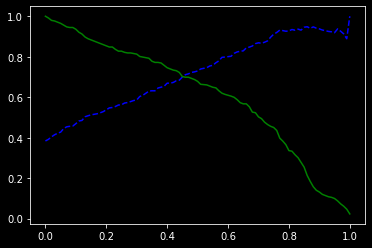

In [401]:
from sklearn.metrics import precision_recall_curve

def plot_prec_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

precisions, recalls, thresholds = precision_recall_curve(titanic_to_train_labels, y_scores_forest)

plot_prec_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show();

Here it shows the precision vs recall tradeoff, it is easy to get 100% precision but at the cost of extrememly poor recall (and vice-versa). You have to find the balance between the two. Here I have visualized the graph against threshold. The best threshold to pick is clearly around 0.42

In [402]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = SGDClassifier()
tree_clf.fit(titanic_prepared, titanic_to_train_labels)

titanic_predictions_tree = tree_clf.predict(titanic_prepared)

print(f"ROC AUC Score: {roc_auc_score(titanic_to_train_labels, titanic_predictions_tree)}")
print(f"Precision Score: {precision_score(titanic_to_train_labels, titanic_predictions_tree)}")
print(f"Recall Score: {recall_score(titanic_to_train_labels, titanic_predictions_tree)}")

ROC AUC Score: 0.7989646246764452
Precision Score: 0.8080808080808081
Recall Score: 0.7017543859649122


Wow, this model is much better than using `RandomForestClassifier`, let's see the F1 score 

In [403]:
#titanic_predictions_tree_pred = cross_val_predict(tree_clf, titanic_prepared, titanic_to_train_labels, cv=20)
print("Confusion Matrix:\n", confusion_matrix(titanic_to_train_labels, titanic_predictions_tree_pred))
print("\nF1 Score:", f1_score(titanic_to_train_labels, titanic_predictions_tree_pred))

Confusion Matrix:
 [[495  54]
 [ 72 270]]

F1 Score: 0.8108108108108109


That's really good, from experimenting with models and parameters, we went from ~70% to 81%! This is definetely the upper bound of Kaggle submissions, but let's keep experimenting

In [404]:
cross_val_score(tree_clf, titanic_prepared, titanic_to_train_labels, cv=5, scoring="accuracy")

array([0.67597765, 0.79775281, 0.78089888, 0.78651685, 0.78651685])

In [405]:
from sklearn.neural_network import MLPClassifier

kneighbour_MLP = MLPClassifier()
kneighbour_MLP.fit(titanic_prepared, titanic_to_train_labels)

kneighbour_MLP_pred = kneighbour_MLP.predict(titanic_prepared)

print(f"ROC AUC Score: {roc_auc_score(titanic_to_train_labels, kneighbour_MLP_pred)}")
print(f"Precision Score: {precision_score(titanic_to_train_labels, kneighbour_MLP_pred)}")
print(f"Recall Score: {recall_score(titanic_to_train_labels, kneighbour_MLP_pred)}")
print(f"F1 Score", f1_score(titanic_to_train_labels, kneighbour_MLP_pred))

ROC AUC Score: 0.8635557472917266
Precision Score: 0.9195804195804196
Recall Score: 0.7690058479532164
F1 Score 0.8375796178343948


Even better! This is a very nice F1 score.

Let's get ready to submit to kaggle:

In [406]:
# clean test data
titanic_test["Family"] = (titanic_test["SibSp"] + titanic_test["Parch"])**2
mean = titanic_test["Age"].mean()
titanic_test["Age"].fillna(mean, inplace=True)
titanic_test["Cabin"].fillna("", inplace=True)
titanic_test["Embarked"].fillna("", inplace=True)
mean_fare = titanic_test["Fare"].mean()
titanic_test["Fare"].fillna(mean_fare, inplace=True)

# use our transformer to change the data
titanic_test_prepared = full_pipeline.transform(titanic_test)
print(titanic_test_prepared)

test_kneighbour_MLP_final = kneighbour_MLP.predict(titanic_test_prepared)

  (0, 0)	1.7339958399701274
  (0, 1)	0.8273772438659699
  (0, 2)	-0.47454519624983954
  (0, 3)	-0.4736736092984604
  (0, 4)	-0.49078316061772326
  (0, 5)	-0.30590644986408505
  (0, 6)	-0.30590644986408505
  (0, 7)	1.0
  (0, 156)	1.0
  (0, 159)	1.0
  (1, 0)	1.7378837230193878
  (1, 1)	0.8273772438659699
  (1, 2)	0.4327933656785018
  (1, 3)	-0.4736736092984604
  (1, 4)	-0.5074788432328381
  (1, 5)	-0.21642429397803786
  (1, 6)	-0.21642429397803786
  (1, 7)	1.0
  (1, 155)	1.0
  (1, 160)	1.0
  (2, 0)	1.7417716060686481
  (2, 1)	-0.3693648410115938
  (2, 2)	-0.47454519624983954
  (2, 3)	-0.4736736092984604
  (2, 4)	-0.4533668714188957
  :	:
  (415, 5)	-0.30590644986408505
  (415, 6)	-0.30590644986408505
  (415, 7)	1.0
  (415, 156)	1.0
  (415, 160)	1.0
  (416, 0)	3.3513551884624437
  (416, 1)	0.8273772438659699
  (416, 2)	-0.47454519624983954
  (416, 3)	-0.4736736092984604
  (416, 4)	-0.4863374216869257
  (416, 5)	-0.30590644986408505
  (416, 6)	-0.30590644986408505
  (416, 7)	1.0
  (416, 15

In [407]:
titanic_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Family  
0  34.5      0      0   330911   7.8292              Q       0  
1  47.0      1      0   363272   7.0000              S       1  
2  62.0      0      0   240276   9.6875              Q       0  
3  27.0      0      0   315154   8.6625              S       0  
4  22.0      1      1  3101298  12.2875              S       4

In [408]:
# parse results into kaggle format
data = {"PassengerId": [], "Survived": []}

for i, prediction in enumerate(test_kneighbour_MLP_final):
    data["PassengerId"].append(892 + i)
    data["Survived"].append(prediction)

submission = pd.DataFrame(data, columns=["PassengerId", "Survived"])

pd.DataFrame.to_csv(submission, "submission.csv", index=False)

That's it, thanks for following along! In the end I achieved a score of 0.76315, which could be made better with smarter feature engineering and tinkering with hyperparameters (and using a nueral network in Tensor) but I'm happy with it